# Linear Regression

<!-- useful links
![Linear_regression_img](https://github.com/iliasprc/pytorch-tutorials/blob/master/1_getting_started/figures/1.7.linear_regression.png)



https://www.youtube.com/watch?v=zPG4NjIkCjc

https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch -->

Regression analysis is a statistical tool  for determining the connection of two or more variables.

Linear Regression models a linear relationship between two variables. 


In more detail, the regression is referred to as Simple Linear Regression, when there is just one input variable. To describe a linear connection with the   dependent   variable  $y$, we employ a single independent variable $x$.
Linear Regression is represented by the  equation  $y=ax+b$ and aims to find the optimal values of $a$ and $b$ that best describe the relationship of the variables. More specifically, this equation describes a straight
line with slope equal to $a$, while $b$ the intercept (the value of $y$ when $x = 0$). 

If there is more than predicting variable, the regression is referred to as Multiple Linear Regression.

Now, let's create and initialize randomly our linear regression model's variables  $a$ and $b$.

In [66]:
import torch
import torch.nn as nn
import numpy as np

torch.manual_seed(0)

In [2]:

a = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
print(a)
print(b)


x = torch.randn(1)
y = a*x+b

y.backward()
print(y,x)

tensor([1.5410], requires_grad=True)
tensor([-0.2934], requires_grad=True)
tensor([-3.6509], grad_fn=<AddBackward0>) tensor([-2.1788])


## Fitting a simple line

Let's create a simple dataset and try to fit our linear regression model. We'll initialize randomly our $a$ and $b$ and try to run
some iterations to find the optimal weights that fit our following line.

$y=2x+0.5$

The following code block creates  the model.

In [3]:

a = torch.randn((1,1),requires_grad=True)
b = torch.randn(1,requires_grad=True)

def model(x):
    return x @ a.t() + b


## Least-Squares Regression
The least-squares approach is the most frequent method for fitting a regression line.
By reducing the sum of the squares of the vertical deviations from each data point to the line, this approach determines the best-fitting line for the observed data (if a point lies on the fitted line exactly, then its vertical deviation is 0).
There are no cancellations between positive and negative numbers since the deviations are squared first and then summed. 

### MSE LOSS
Mean Squared Error (MSE) or mean squared deviation (MSD) of an estimator
(of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors.

$MSE(y,\hat {y}) =\sum_{i=1}^{N} (y_{i}-\hat{y}_{i})^{2} $

In other words MSE is the mean ${ \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$
of the squares of the errors ${ (y_{i}-{\hat {y_{i}}})^{2}}$

In [4]:
def mse(y,y_hat):
     return((y-y_hat)**2).mean()




### Create dataset
Now we'll create our data that decribe the equation $y=2x+0.5$.
We will create only 10 samples but you can do more if you like by changing the variable $N$


In [5]:
N=10
inputs = torch.range(1,N).float().unsqueeze(-1)
print(inputs.shape)
print(inputs)
targets = 2. * inputs + 0.5 * torch.ones(N,1)
print(targets.shape)
print(targets)

torch.Size([10, 1])
tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])
torch.Size([10, 1])
tensor([[ 2.5000],
        [ 4.5000],
        [ 6.5000],
        [ 8.5000],
        [10.5000],
        [12.5000],
        [14.5000],
        [16.5000],
        [18.5000],
        [20.5000]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  


Let's predict $\hat{y}$ with the untrained model and see what the output and loss values.


In [6]:
preds = model(inputs)
print(preds)


# Compute loss
loss = mse(preds, targets)
print(loss)

# Compute gradients
loss.backward()

tensor([[-0.5161],
        [ 0.0523],
        [ 0.6208],
        [ 1.1892],
        [ 1.7576],
        [ 2.3261],
        [ 2.8945],
        [ 3.4629],
        [ 4.0314],
        [ 4.5998]], grad_fn=<AddBackward0>)
tensor(106.3641, grad_fn=<MeanBackward0>)


Now if we do one backpropagation step, the gradients of the two parameters $a$ and $b$ we will be calculated.

In [7]:
# Gradients for weights
print(a)
print(a.grad)

# Gradients for bias
print(b)
print(b.grad)

a.grad.zero_()
b.grad.zero_()
print(a.grad)
print(b.grad)

tensor([[0.5684]], requires_grad=True)
tensor([[-127.6605]])
tensor([-1.0845], requires_grad=True)
tensor([-18.9163])
tensor([[0.]])
tensor([0.])


It's time train the model now for 100 iterations and test again the predictions.


In [8]:
# Train for 100 epochs
lr = 1e-3
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        a.grad.zero_()
        b.grad.zero_()

print('Optimization Done')
print(f'a = {a} b = {b}')

# Generate predictions
preds = model(inputs)
print(f'Predictions {preds}')


# Compute loss
loss = mse(preds, targets)
print(f'Loss = {loss.item()}')

preds = model(inputs)
import matplotlib.pyplot as pyplot


Optimization Done
a = tensor([[2.1856]], requires_grad=True) b = tensor([-0.7955], requires_grad=True)
Predictions tensor([[ 1.3901],
        [ 3.5757],
        [ 5.7614],
        [ 7.9470],
        [10.1326],
        [12.3182],
        [14.5039],
        [16.6895],
        [18.8751],
        [21.0607]], grad_fn=<AddBackward0>)
Loss = 0.3596566319465637


Now let`s plot our the predictions of the model ($\hat{y}$) and observe if they are close to our targets ($y$).


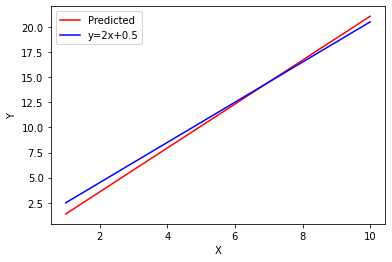

In [9]:
line_pred = pyplot.plot(inputs.numpy(),preds.detach().numpy(),'r',label = 'Predicted')
line_target = pyplot.plot(inputs.numpy(),targets.detach().numpy(),'b',label = 'y=2x+0.5')
pyplot.legend(loc="upper left")
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()


## Multiple Linear Regression

### Run Linear Regression with multidimensional data



$$
y =
\left[ \begin{array}{cc}
x_{11} & x_{12} &x_{13} \\
x_{21} & x_{22} &x_{23} \\
\vdots & \vdots & \vdots \\
x_{N1} & x_{N2} &x_{N3}
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

Wine Quality dataset

Now, we will try to solve a real problem  instead of using random data. We will use the linear regression model to
predict the wine quality based on different metrics (pH, acidity, etc.)
You can download the dataset from the following link,
![Dataset link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality),

Let's read our dataset now and explore what type of data it contains.

![wine_data](https://github.com/iliasprc/pytorch-tutorials/blob/master/1_getting_started/figures/1.7.data_viz.png?raw=1)

In [59]:
import csv

def read_wine_data():
    with open('winequality-red.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        
        line_count = 0
        wine_data = []
        categories = []
        for idx,row in enumerate(csv_reader):
            #print(row)
            if idx ==0 :
                categories = row
            else:
                r = list(map(float, row))
                wine_data.append(r)
        # Convert inputs and targets to tensors
        data_tensor = torch.tensor(wine_data)
    return data_tensor,categories




data_tensor,categories = read_wine_data()
inputs = data_tensor[:,:-1]
targets = data_tensor[:,-1].unsqueeze(-1)
print(inputs.shape)
print(targets.shape)



torch.Size([1599, 11])
torch.Size([1599, 1])


Now we will cosntruct our linear regression model using `model()` function and the MSE loss `mse()`for the optimization using the least squares method.

In [64]:

a = torch.randn(1, 11, requires_grad=True)
b = torch.randn(1, requires_grad=True)
# Define the model
def model(x):
    return x @ a.t() + b

# MSE loss

def mse(y,y_hat):
     return((y-y_hat)**2).mean()



Let's fit the whole dataset once to and observe the loss value and the gradients.

In [61]:
# Generate predictions
preds = model(inputs)
print(preds)

# Compute loss
loss = mse(preds, targets)
print(loss.item())

# Compute gradients
loss.backward()

# Gradients for weights
print(a)
print(a.grad)

# Gradients for bias
print(b)
print(b.grad)

a.grad.zero_()
b.grad.zero_()
print(a.grad)
print(b.grad)

tensor([[32.2434],
        [36.3522],
        [39.5605],
        ...,
        [24.7045],
        [19.7853],
        [40.5215]], grad_fn=<AddBackward0>)
1197.431884765625
tensor([[-0.3629,  0.4028,  1.0718,  3.1510, -0.3178, -0.9579,  0.4065,  0.4106,
         -1.8387,  0.8823,  3.2554]], requires_grad=True)
tensor([[ 543.6219,   34.7763,   18.4397,  181.1810,    5.7427, 1029.6223,
         3506.3984,   65.1608,  216.0801,   43.1362,  683.9539]])
tensor([0.3486], requires_grad=True)
tensor([65.3699])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([0.])


Let's train again our linear regression model using the wine dataset now.

In [65]:
# Train for 100 epochs
lr = 1e-4
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    # Calculate gradients
    loss.backward()
    # Adjust weights & reset gradients
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        a.grad.zero_()
        b.grad.zero_()

print(f'Loss {loss.item():.2f}')



Loss 54.39


### Define Linear Regression model using PyTorch built in Functions

Now, we are going to reimplement the same model using PyTorch built-in libraries.
To create a linear model we will use `Linear()` class from `torch.nn` package.
To calculate MSE loss we will import `nn.MSELoss()` and `torch.optim.SGD` to
create a stochastic gradient descent optimizer to train our model.
These are the main steps to do
- Read Data
- Create Dataloader
- Create Model, Optimizer and Loss Functions
- Train the model
- Test the model

Let's train again our classifier to predict the linear relationship $y=2x+0.5$
and then we are going to classify again the wine dataset.

In [24]:
inputs = torch.arange(0,10).float().unsqueeze(-1)

targets = 2. * torch.arange(0,10).float().unsqueeze(-1) + 0.5*torch.ones(10,1)

lr_model = nn.Linear(in_features=1,out_features=1)
optimizer = torch.optim.SGD(lr_model.parameters(),lr=0.001)
criterion = nn.MSELoss()

for i in range(100):
    preds = lr_model(inputs)
    loss = criterion(preds,targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
print(f'Loss {loss.item()}')
print('a = ' ,lr_model.weight.data)
print('b = ',lr_model.bias.data)


Loss 0.0020583984442055225
a =  tensor([[1.9849]])
b =  tensor([0.5606])


Now, let's classify again our wine dataset now using the PyTorch built-in functions now from `torch.nn` package. We will create a linear regression model using `nn.Linear()` class.

In [43]:

data_tensor,categories = read_wine_data()
#results = list(map(int, results))
print(data_tensor.shape)
print(categories)
inputs = data_tensor[:,:-1]
targets = data_tensor[:,-1].unsqueeze(-1)
 
#results = list(map(int, results))

lr_model = nn.Linear(in_features=11,out_features=1)
optimizer = torch.optim.SGD(lr_model.parameters(),lr=0.0001)
criterion = nn.MSELoss()

print('Initialize weights for the linear model ')
print('w = ', lr_model.weight)

print('b = ',lr_model.bias)

torch.Size([1599, 12])
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Initialize weights for the linear model 
w =  Parameter containing:
tensor([[-0.2748, -0.0190,  0.1894,  0.0783,  0.0953,  0.0280,  0.1124, -0.0735,
         -0.1199, -0.2818, -0.2271]], requires_grad=True)
b =  Parameter containing:
tensor([0.1307], requires_grad=True)


Now, we'll create an iterable dataset in order to train our model. We'll use `TensorDataset` and  `DataLoader`
from PyTorch. `TensorDataset` takes inputs and targets tensors as arguments and wraps them together. Then, the `Dataloader`
combines a dataset and a sampler and  provides an iterable over the given dataset in order to generate batches.


In [44]:
from torch.utils.data import TensorDataset, DataLoader
# Define dataset
train_ds = TensorDataset(inputs, targets)
# Define data loader
batch_size = 10
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[1.0200e+01, 4.4000e-01, 5.8000e-01, 4.1000e+00, 9.2000e-02, 1.1000e+01,
          2.4000e+01, 9.9745e-01, 3.2900e+00, 9.9000e-01, 1.2000e+01],
         [6.6000e+00, 6.1000e-01, 1.0000e-02, 1.9000e+00, 8.0000e-02, 8.0000e+00,
          2.5000e+01, 9.9746e-01, 3.6900e+00, 7.3000e-01, 1.0500e+01],
         [9.9000e+00, 5.3000e-01, 5.7000e-01, 2.4000e+00, 9.3000e-02, 3.0000e+01,
          5.2000e+01, 9.9710e-01, 3.1900e+00, 7.6000e-01, 1.1600e+01],
         [1.0400e+01, 4.3000e-01, 5.0000e-01, 2.3000e+00, 6.8000e-02, 1.3000e+01,
          1.9000e+01, 9.9600e-01, 3.1000e+00, 8.7000e-01, 1.1400e+01],
         [9.9000e+00, 3.5000e-01, 4.1000e-01, 2.3000e+00, 8.3000e-02, 1.1000e+01,
          6.1000e+01, 9.9820e-01, 3.2100e+00, 5.0000e-01, 9.5000e+00],
         [5.0000e+00, 3.8000e-01, 1.0000e-02, 1.6000e+00, 4.8000e-02, 2.6000e+01,
          6.0000e+01, 9.9084e-01, 3.7000e+00, 7.5000e-01, 1.4000e+01],
         [7.9000e+00, 8.8500e-01, 3.0000e-02, 1.8000e+00, 5.8000e-02, 4.0000e+00,


Now we are ready to train our model.


In [45]:
epochs = 20
for i in range(epochs):
    average_loss = 0.0
    for batch_index, (x,y) in enumerate(train_dl):
        preds = lr_model(x)
        loss = criterion(preds,y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        average_loss +=loss.item()
    print(f'Epoch {i} Average_loss {average_loss/len(train_dl):.2f}')
    


Epoch 0 Average_loss 10.35
Epoch 1 Average_loss 0.94
Epoch 2 Average_loss 0.65
Epoch 3 Average_loss 0.62
Epoch 4 Average_loss 0.60
Epoch 5 Average_loss 0.59
Epoch 6 Average_loss 0.59
Epoch 7 Average_loss 0.58
Epoch 8 Average_loss 0.57
Epoch 9 Average_loss 0.56
Epoch 10 Average_loss 0.56
Epoch 11 Average_loss 0.56
Epoch 12 Average_loss 0.54
Epoch 13 Average_loss 0.55
Epoch 14 Average_loss 0.55
Epoch 15 Average_loss 0.56
Epoch 16 Average_loss 0.54
Epoch 17 Average_loss 0.54
Epoch 18 Average_loss 0.55
Epoch 19 Average_loss 0.53


In [47]:
print('Learned parameters of the linear regression model')
print('w = ', lr_model.weight)
print('b = ',lr_model.bias)

Learned parameters of the linear regression model
w =  Parameter containing:
tensor([[ 0.1091, -0.0068,  0.2012,  0.0485,  0.0993,  0.0092, -0.0007, -0.0137,
          0.0814, -0.2258,  0.4060]], requires_grad=True)
b =  Parameter containing:
tensor([0.1908], requires_grad=True)
